<a href="https://colab.research.google.com/github/Quark-hadron/Red-Wine-Quality/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown --id 1rR_DB_w3PoKBP4sowyNw9JYwEdid9xG4

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rR_DB_w3PoKBP4sowyNw9JYwEdid9xG4
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 86.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, yeojohnson
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

#preprocessing
from sklearn.preprocessing import LabelEncoder

#val
from sklearn.model_selection import train_test_split

#scaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

#model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#metrics
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
sum(df.duplicated())

240

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1359, 12)

1 - фиксированная кислотность

2 - летучая кислотность

3 - лимонная кислота

4 - остаточный сахар

5 - хлориды

6 - свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - рН

10 - сульфаты

11 - алкоголь

Выходная переменная (на основе сенсорных данных):

12 - качество (оценка от 0 до 10)

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['alcohol'].value_counts()

,count
alcohol,
9.500000,111
9.400000,91
9.200000,65
9.800000,63
10.000000,61
...,...
9.950000,1
9.233333,1
9.250000,1


In [ ]:
display(pd.crosstab(round(df['alcohol'], 1), df['quality']))

quality,3,4,5,6,7,8
alcohol,,,,,,
8.4,1,0,0,1,0,0
8.5,0,0,1,0,0,0
8.7,0,0,0,2,0,0
8.8,0,0,1,0,0,0
9.0,1,3,10,8,0,0
9.1,0,2,13,6,0,0
9.2,0,3,47,16,1,0
9.3,0,2,44,10,0,0
9.4,0,2,70,19,0,0


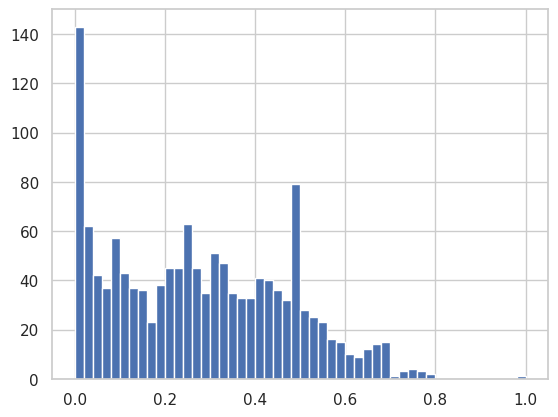

In [ ]:
plt.hist(df['citric acid'], bins=50);

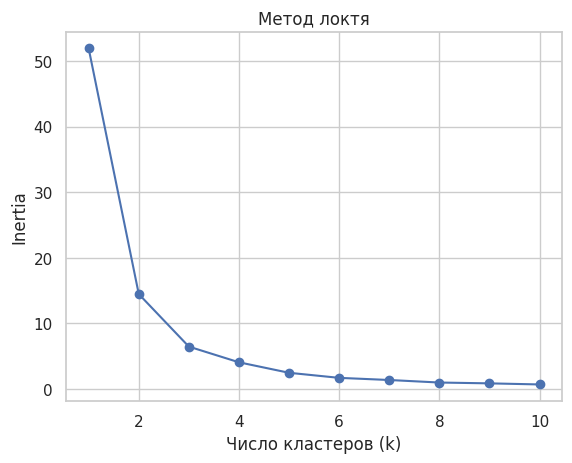

In [ ]:
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=676)
  kmeans.fit(df['citric acid'].to_numpy().reshape(-1,1))
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

In [ ]:
k_means = KMeans(n_clusters=3, random_state=12)
cluster = k_means.fit_predict(df['citric acid'].to_numpy().reshape(-1,1))

In [ ]:
cluster.shape

(1359,)

In [ ]:
centers = k_means.cluster_centers_
threshold = (centers[0][0] + centers[1][0] + centers[1][0]) / 3

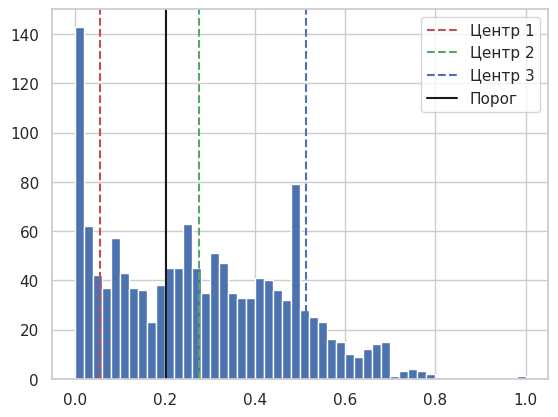

In [ ]:
plt.hist(df['citric acid'], bins=50)
plt.axvline(x=centers[0][0], color='r', linestyle='--', label='Центр 1')
plt.axvline(x=centers[1][0], color='g', linestyle='--', label='Центр 2')
plt.axvline(x=centers[2][0], color='b', linestyle='--', label='Центр 3')
plt.axvline(x=threshold, color='k', linestyle='-', label='Порог')
plt.legend()
plt.show()

In [ ]:
#df['citric acid'] = pd.DataFrame(cluster, columns=['citric acid'], index=df.index)

In [ ]:
df['citric acid'].value_counts()

,count
citric acid,
0.00,118
0.49,59
0.24,41
0.02,38
0.08,32
...,...
0.79,1
0.71,1
0.72,1


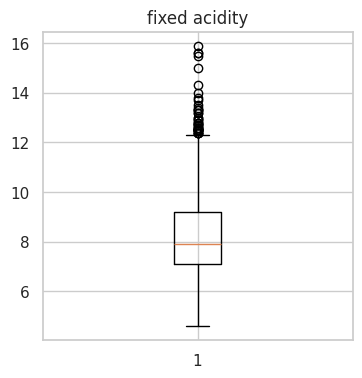

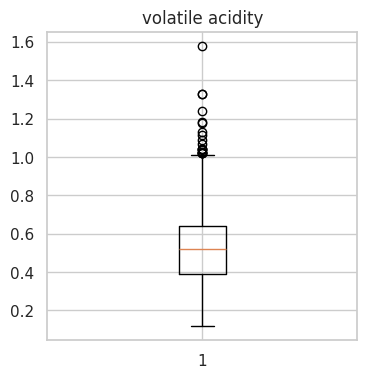

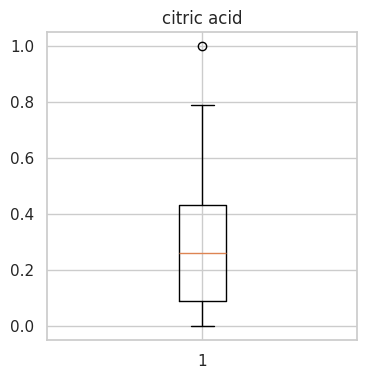

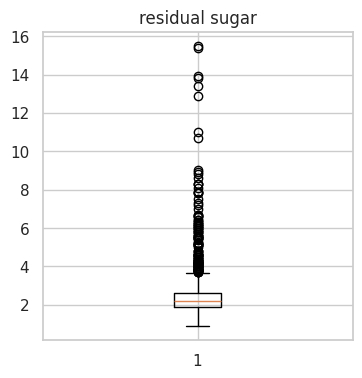

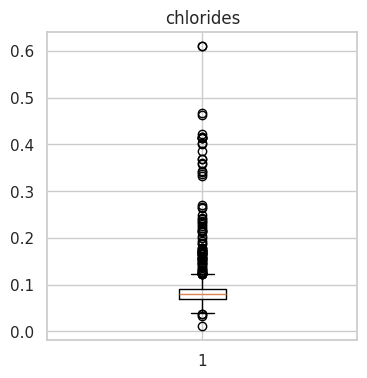

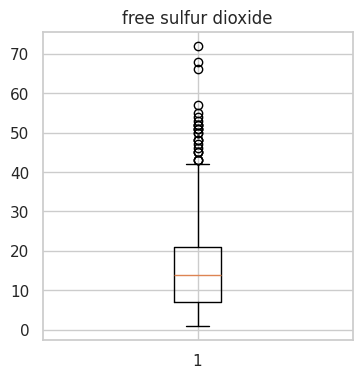

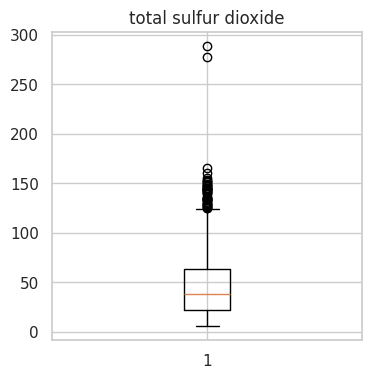

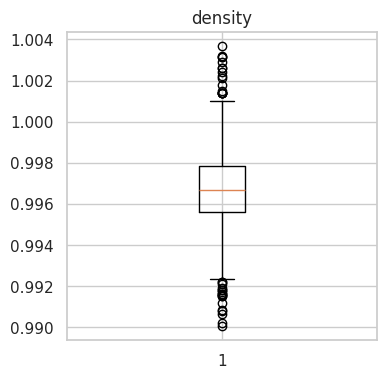

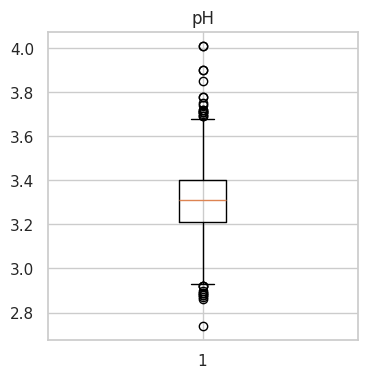

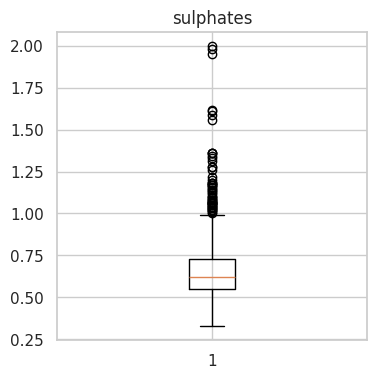

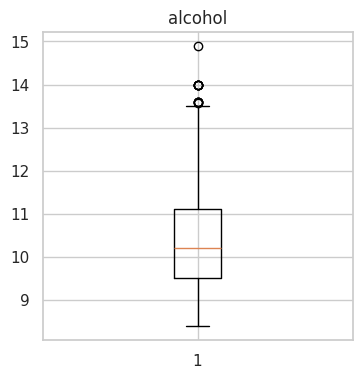

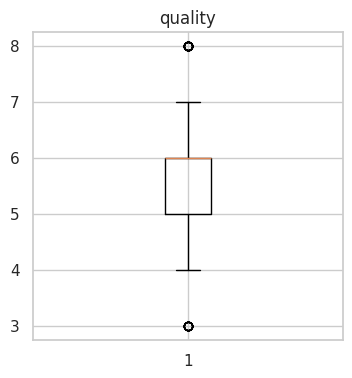

In [ ]:
for col in df.columns:
  fig = plt.figure(figsize=(4,4))
  ax = fig.add_subplot(111)
  ax.title.set_text(f'{col}')
  ax.boxplot(df[col])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

test_bound = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [ ]:
test_bound

,0
fixed acidity,41
volatile acidity,19
citric acid,1
residual sugar,126
chlorides,87
free sulfur dioxide,26
total sulfur dioxide,45
density,35
pH,28
sulphates,55


In [ ]:
#df = df.clip(lower_bound, upper_bound, axis=1)
#test_bound = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
#df.shape

In [ ]:
isolf = IsolationForest(contamination=0.05, random_state=1)
isolf.fit(df)
anomaly_imputs = isolf.predict(df) == 1
df_anomaly = df[anomaly_imputs]

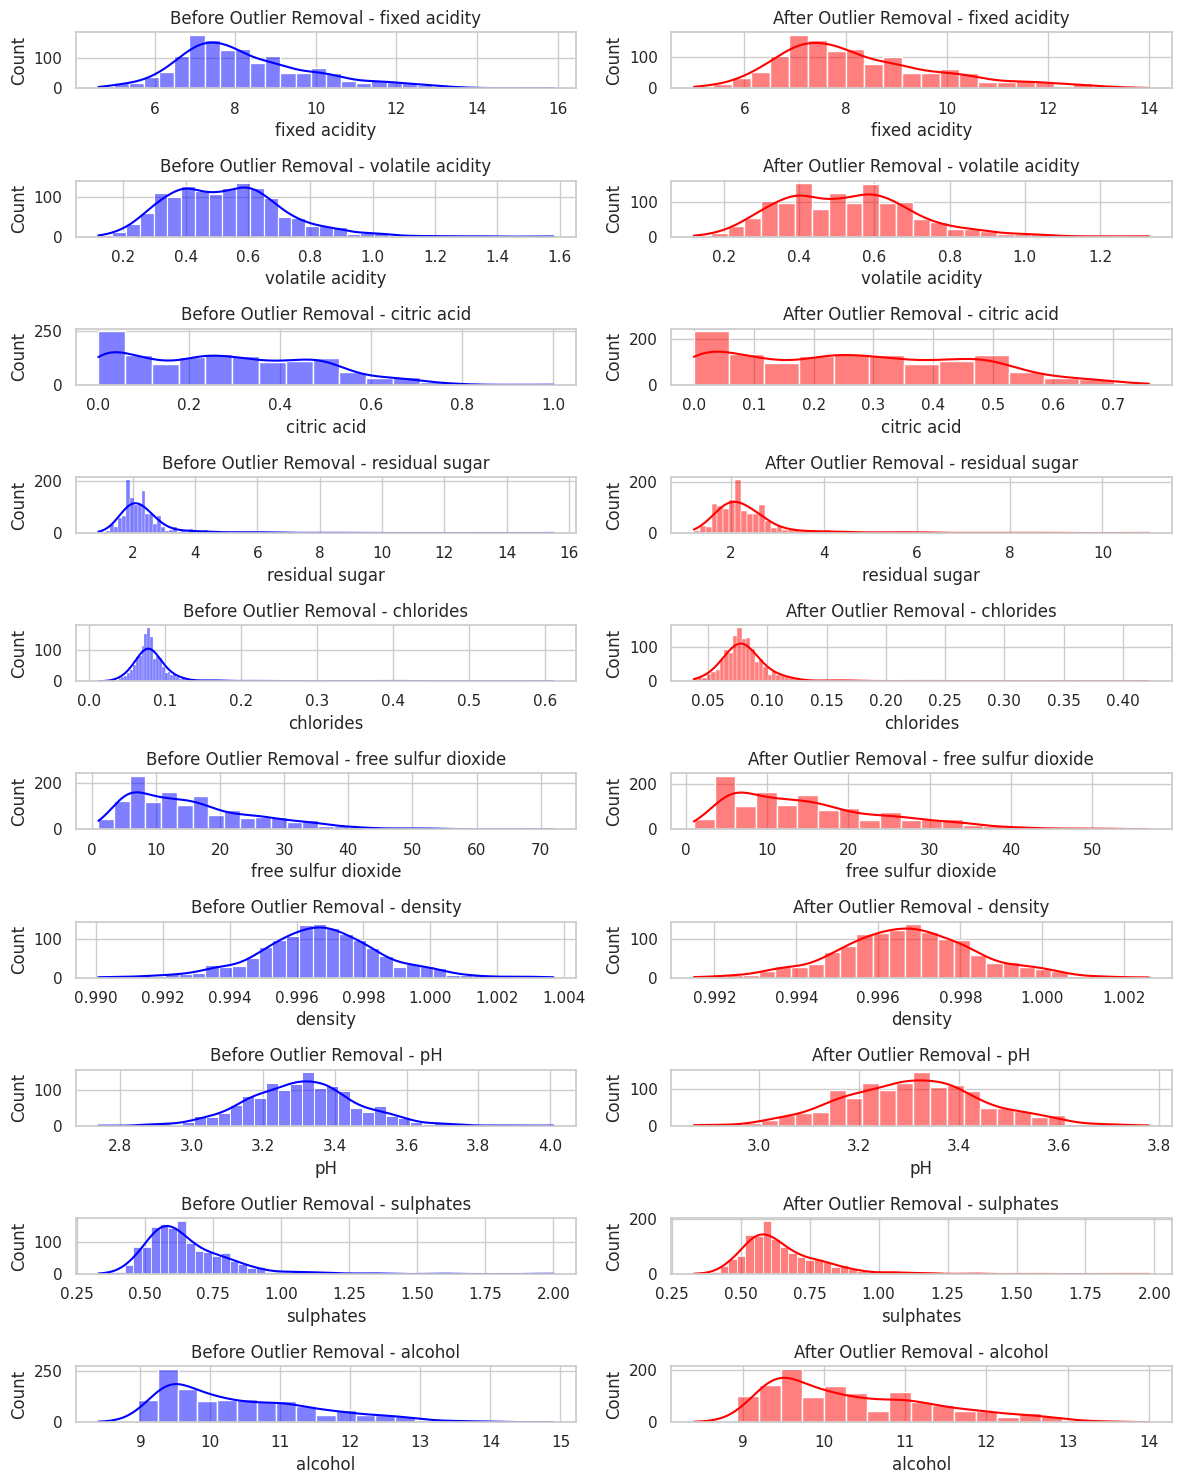

In [ ]:
columns_to_plot = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(12, 15))
for i, column in enumerate(columns_to_plot):

    sns.histplot(data=df, x=df[column], ax=axes[i, 0], color='blue', kde=True)
    axes[i, 0].set_title(f"Before Outlier Removal - {column}")

    sns.histplot(data=df_anomaly, x=df_anomaly[column], ax=axes[i, 1], color='red', kde=True)
    axes[i, 1].set_title(f"After Outlier Removal - {column}")

plt.tight_layout()
plt.show()

In [ ]:
df = df_anomaly

In [ ]:
df.shape

(1291, 12)

In [ ]:
#df_filtered = df.copy()
#for col in df.columns:
#    col_series = df[col]
#    col_lower_bound = lower_bound[col]
#    col_upper_bound = upper_bound[col]
#    df_filtered = df_filtered[(col_series >= col_lower_bound) & (col_series <= col_upper_bound)]
#
#df = df_filtered
#test_bound = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [ ]:
test_bound

,0
fixed acidity,41
volatile acidity,19
citric acid,1
residual sugar,126
chlorides,87
free sulfur dioxide,26
total sulfur dioxide,45
density,35
pH,28
sulphates,55


In [ ]:
#sns.pairplot(df)

In [ ]:
def hist_normal_dist(df):

  for col in df.columns:
    median_data = df[col].median()
    mean_data = df[col].mean()
    mode_data = df[col].mode()[0]

    if  int(median_data) == int(mean_data) == int(mode_data):
      print(f'В: {col}')
      print('Распределение нормальное:\n')

    else:
      print(f'В: {col}')
      print('Распределение ненормальное\n')

      fig = plt.figure(figsize=(7,4))
      ax = fig.add_subplot(111)
      ax.title.set_text(f'to dist features: {col}')
      ax.hist(df[col])

      ax.axvline(df[col].mean(), c='r', linestyle='--', label='Mean')
      ax.axvline(df[col].median(), c='y', linestyle='--', label='Median')
      ax.axvline(mode_data, c='g', linestyle='--', label='Mode')
      ax.legend()

      #df[col], _ = boxcox(df[col] + 1) # boxcox
      df[col] = np.log1p(df[col] + 1) # log для правой асиметрии
      #df[col] = np.sqrt(df[col]) # sqrt

      fig_new = plt.figure(figsize=(7,4))
      ax = fig_new.add_subplot(111)
      ax.title.set_text(f'after logarithm dist features: {col}')
      ax.hist(df[col], color='orange')

      ax.axvline(df[col].mean(), c='r', linestyle='--', label='Mean')
      ax.axvline(df[col].median(), c='y', linestyle='--', label='Median')
      ax.axvline(mode_data, c='g', linestyle='--', label='Mode')
      ax.legend()
      plt.show()

В: fixed acidity
Распределение ненормальное



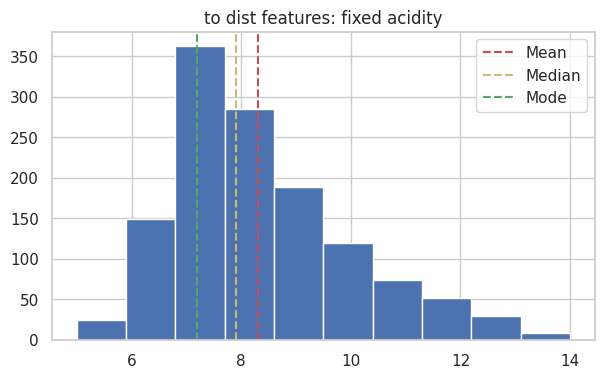

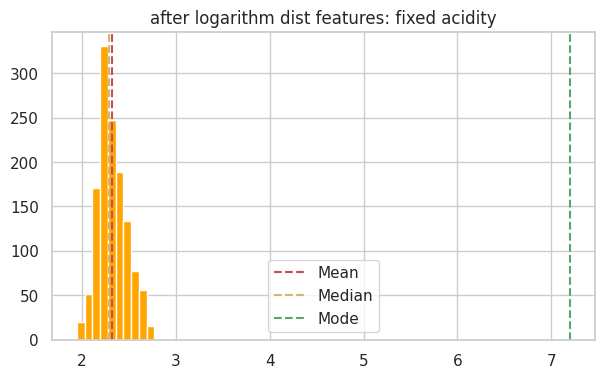

В: volatile acidity
Распределение нормальное:

В: residual sugar
Распределение нормальное:

В: chlorides
Распределение нормальное:

В: free sulfur dioxide
Распределение ненормальное



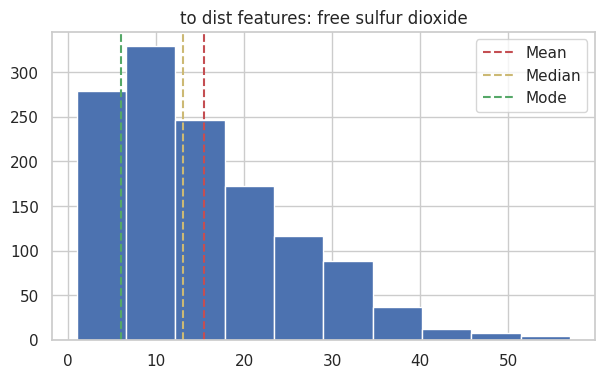

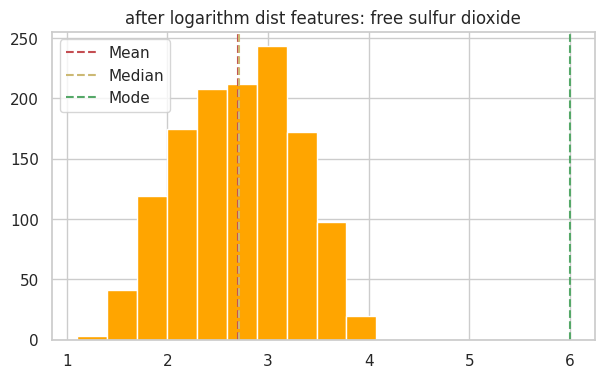

В: total sulfur dioxide
Распределение ненормальное



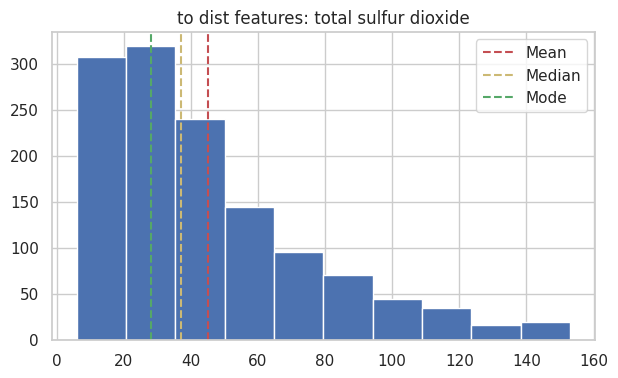

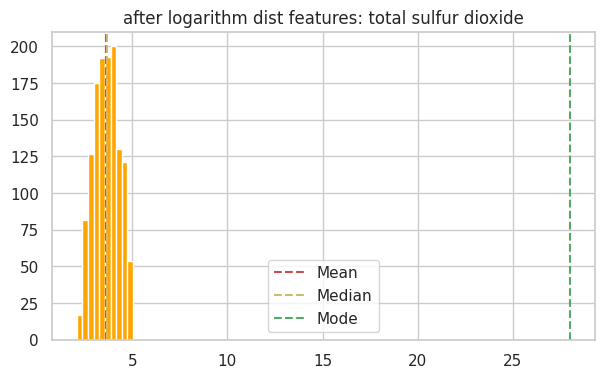

В: density
Распределение нормальное:

В: pH
Распределение нормальное:

В: sulphates
Распределение нормальное:

В: alcohol
Распределение ненормальное



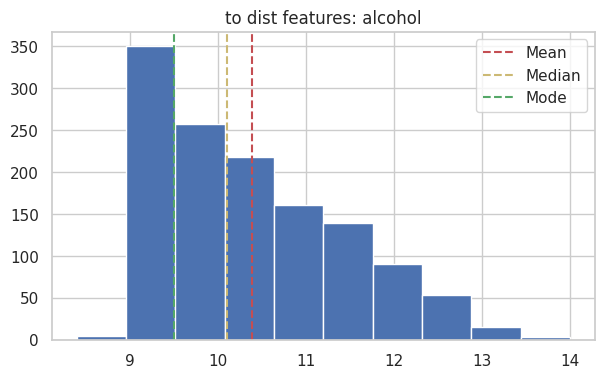

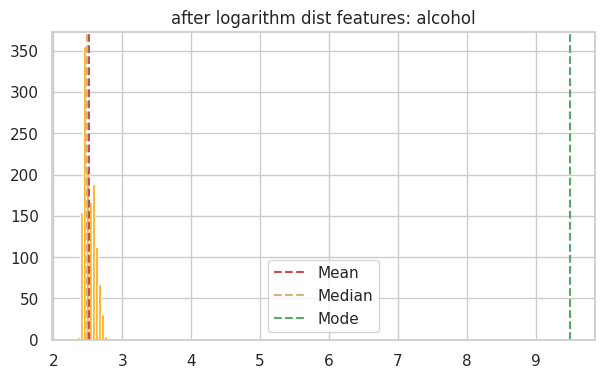

В: quality
Распределение ненормальное



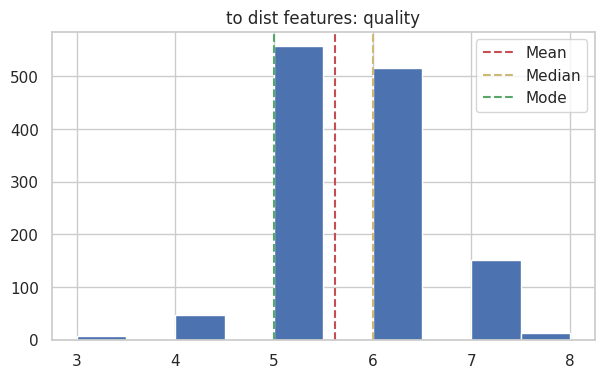

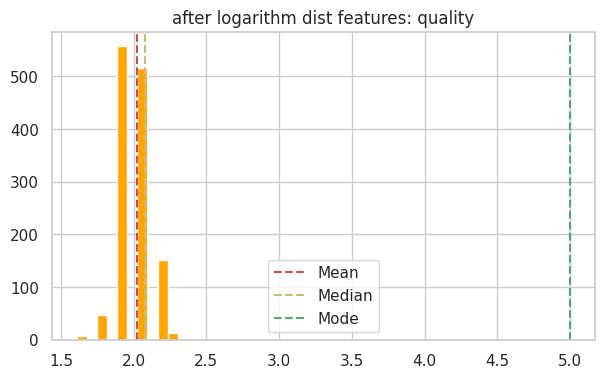

In [ ]:
hist_normal_dist(df.drop('citric acid', axis=1))

In [ ]:
def normal_dist(df):

  list_col_nodist = []

  for col in df.columns:
    median_data = df[col].median()
    mean_data = df[col].mean()
    mode_data = df[col].mode()[0]

    if  int(median_data) != int(mean_data) != int(mode_data):
      list_col_nodist.append(col)
  return list_col_nodist

col_nonormal_dist = normal_dist(df)

for col in df[col_nonormal_dist].columns:
  #df[col], _ = boxcox(df[col] + 1) # boxcox
  df[col] = np.log1p(df[col]) # log для правой асиметрии
  #df[col] = np.sqrt(df[col]) # sqr

In [ ]:
#df.drop(['total sulfur dioxide', 'pH'], axis=1, inplace=True)

<Axes: >

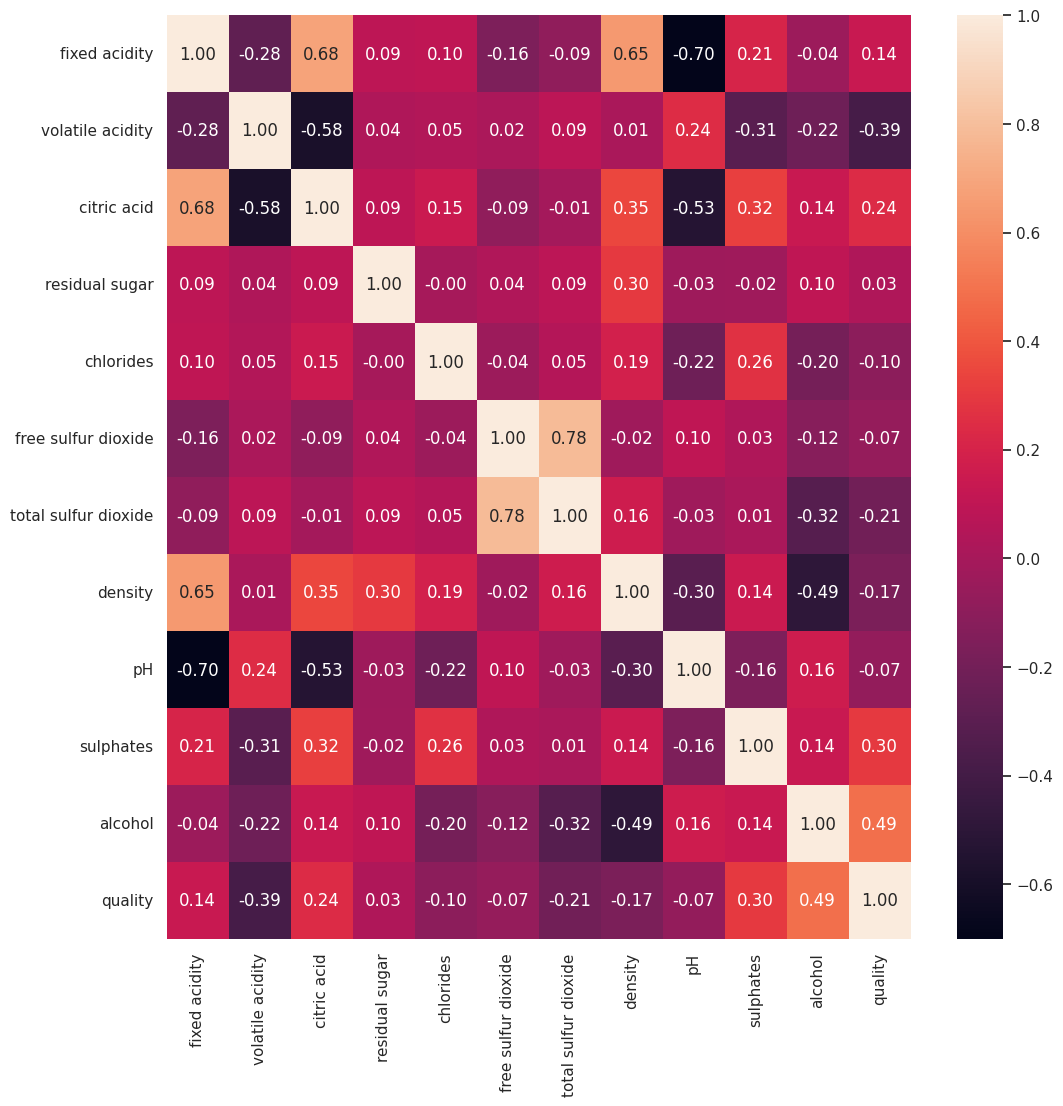

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [ ]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [ ]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

In [ ]:
df['quality'].value_counts()

,count
quality,
0,1127
1,164


<Axes: xlabel='quality', ylabel='count'>

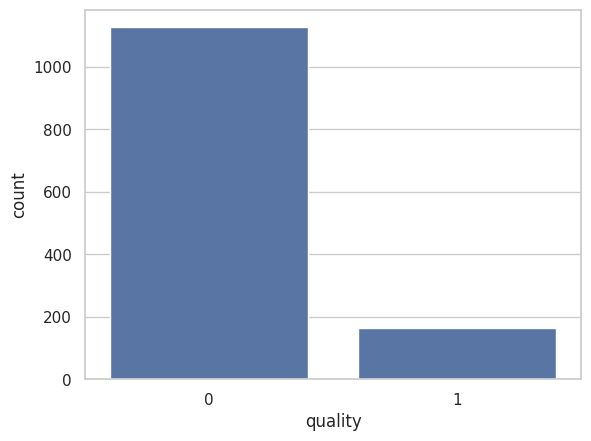

In [ ]:
sns.countplot(data=df, x='quality')

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75757)

In [ ]:
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"R-squared (R2): {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"MAE: {lr_mae:.4f}")

Linear Regression Metrics:
R-squared (R2): 0.2761
RMSE: 0.2837
MAE: 0.1908


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=44234)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [ ]:
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)

print("Random Forest Regression Metrics:")
print(f"R-squared (R2): {rf_r2:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")

Random Forest Regression Metrics:
R-squared (R2): 0.3309
RMSE: 0.2727
MAE: 0.1589


/tmp/ipython-input-4236404502.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared (R2)', data=data, palette='Set2' ,ax=axes[0])
/tmp/ipython-input-4236404502.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=data, palette='Set2', ax=axes[1])
/tmp/ipython-input-4236404502.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=data, palette='Set2', ax=axes[2])


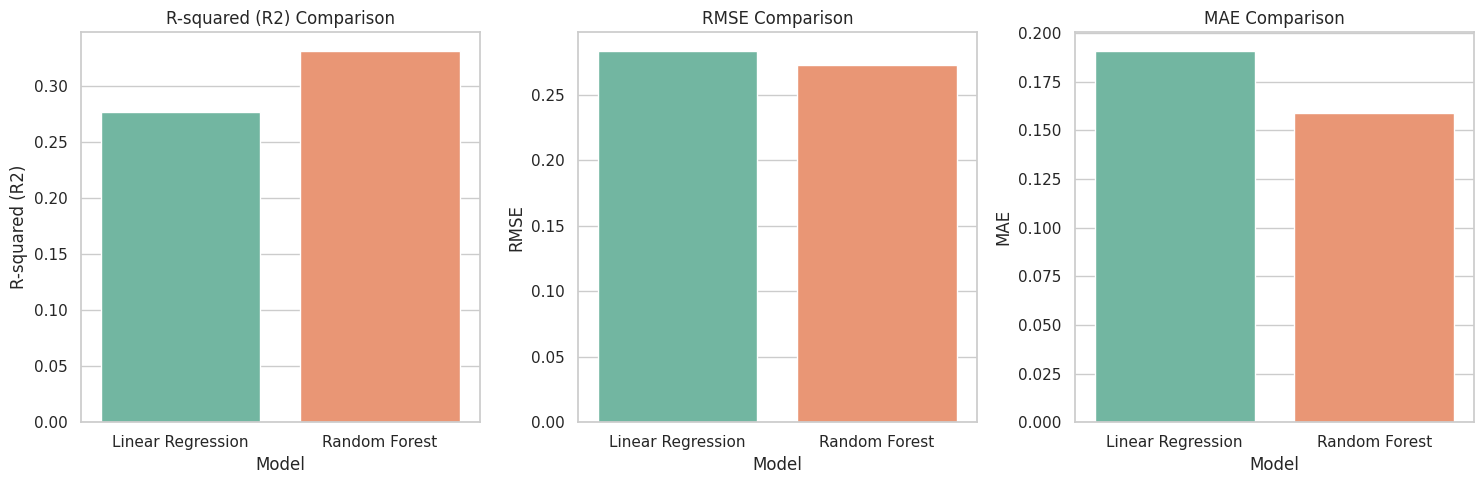

In [ ]:
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_r2, rf_r2]
rmse_values = [lr_rmse, rf_rmse]
mae_values = [lr_mae, rf_mae]

data = pd.DataFrame({
    'Model': models,
    'R-squared (R2)': r2_scores,
    'RMSE': rmse_values,
    'MAE': mae_values
})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#R-squared
sns.barplot(x='Model', y='R-squared (R2)', data=data, palette='Set2' ,ax=axes[0])
axes[0].set_title('R-squared (R2) Comparison')

#RMSE
sns.barplot(x='Model', y='RMSE', data=data, palette='Set2', ax=axes[1])
axes[1].set_title('RMSE Comparison')

#MAE
sns.barplot(x='Model', y='MAE', data=data, palette='Set2', ax=axes[2])
axes[2].set_title('MAE Comparison')

plt.tight_layout()
plt.show()